### 设置 LangSmith 项目名称

In [1]:
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "ChatPPT Jupyter"

### Jupyter 环境设置（与命令行启动保持一致）

1. 项目根目录（ChatPPT）为当前工作目录
2. 源代码目录添加到 Python 路径

In [2]:
# 切换到上一级目录，即项目根目录
os.chdir("..")

# 验证当前工作目录
print("Current working directory:", os.getcwd())

Current working directory: /home/ubuntu/projects/ChatPPT


In [3]:
import sys

# 获取项目源代码目录 src
srouce_code_path = os.path.abspath("./src")

# 将源代码目录 src 添加到 sys.path
sys.path.append(srouce_code_path)

# 打印当前 PYTHON 路径
print(sys.path)

['/home/ubuntu/miniconda3/envs/chatppt/lib/python310.zip', '/home/ubuntu/miniconda3/envs/chatppt/lib/python3.10', '/home/ubuntu/miniconda3/envs/chatppt/lib/python3.10/lib-dynload', '', '/home/ubuntu/miniconda3/envs/chatppt/lib/python3.10/site-packages', '/home/ubuntu/projects/ChatPPT/src']


## 自动检索图像，提升 PowerPoint 表达能力

### 1. ChatBot 生成纯文本

In [4]:
from config import Config
from chatbot import ChatBot

config = Config()
chatbot = ChatBot(config.chatbot_prompt)

In [5]:
print(chatbot.prompt)

**Role**: You are a knowledgeable Chatbot capable of answering a wide range of user questions.

**Task**: When responding to user inquiries, format your answers in a presentation-friendly style suited for PowerPoint slides. Organize the content into a structured, slide-by-slide layout with **at least 10 slides**. Ensure each slide is rich in detail and elaboration.

**Format**: Structure your responses as follows:

```
# [Presentation Theme]  // Only once, for the first slide as the presentation's theme

## [Slide Title]
- [Key point 1]: [Introduction or summary of the point]
  - [Detailed explanation covering multiple aspects or subpoints]
    - [Specific examples, case studies, or further insights]
  - [Additional detail or secondary aspect]
    - [Supporting data, quotes, or statistics]
- [Key point 2]: [Brief introduction or summary]
  - [Expanded description with step-by-step breakdown]
    - [Practical application, scenarios, or research findings]

## [Slide Title]
- [Key point 1

In [6]:
input_text = "向没有做过股票投资的小白，介绍下纳斯达克"

In [7]:
user_requirement = "需求如下:\n" + input_text

In [8]:
slides_content = chatbot.chat_with_history(user_requirement)

2024-11-01 18:58:56 | DEBUG | chatbot:chat_with_history:76 - [ChatBot] # 纳斯达克简介

## 纳斯达克概述
- **什么是纳斯达克**: 纳斯达克是美国的一个股票交易市场。
  - 纳斯达克全称为“全国证券交易商自动报价系统”，成立于1971年，是全球第一个电子股票市场。
  - 它主要以科技公司为主，吸引了许多创新型企业上市。
- **纳斯达克的功能**: 提供股票交易和信息服务。
  - 交易者可以通过电子系统进行股票买卖，提升了交易效率。
  - 纳斯达克还提供实时的市场数据和分析工具，帮助投资者做出决策。

## 纳斯达克的市场结构
- **市场类型**: 纳斯达克是一个场外交易市场（OTC）。
  - 与传统的交易所不同，纳斯达克没有物理交易场所，所有交易通过电子系统进行。
  - 这种结构使得纳斯达克能够提供更灵活的交易方式。
- **上市公司**: 纳斯达克上市公司主要集中在高科技和生物科技领域。
  - 例如，知名公司如苹果、亚马逊和谷歌母公司Alphabet均在纳斯达克上市。
  - 这些公司通常具有较高的市场增长潜力，吸引了大量投资者。

## 纳斯达克的指数
- **纳斯达克综合指数**: 反映纳斯达克市场整体表现的主要指数。
  - 该指数包含了纳斯达克上市的所有股票，广泛用于衡量市场的健康状况。
  - 投资者可以通过观察该指数的变动来判断市场趋势。
- **纳斯达克100指数**: 包含100家最大的非金融公司。
  - 该指数侧重于大型科技公司，常被视为科技行业的风向标。
  - 投资者可以通过该指数了解科技股的整体表现。

## 纳斯达克的交易机制
- **电子交易系统**: 纳斯达克的交易完全依赖电子系统。
  - 交易者通过计算机进行订单的输入和执行，减少了人为错误。
  - 该系统支持高频交易，能够快速响应市场变化。
- **做市商制度**: 纳斯达克采用做市商制度来提供流动性。
  - 做市商是为特定股票提供买卖报价的公司，确保市场有足够的流动性。
  - 这种机制帮助投资者在需要时能够迅速买入或卖出股票。

## 纳斯达克的投资机会
- **高增长潜力**: 纳斯达克上市公司大多具有较高的增长潜力。
  - 科技行业的快速发展使得许多公司在短时间内实现

### 2. 基于内容嵌入图像

In [10]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate  # 导入提示模板相关类
from langchain_core.messages import HumanMessage  # 导入消息类

In [11]:
with open("prompts/image_advisor.txt", "r", encoding="utf-8") as file:
    system_prompt = file.read().strip()

In [12]:
chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),  # 系统提示部分
    ("human", "**Content**:\n\n{input}"),  # 消息占位符
])

In [13]:
chat_model = ChatOpenAI(
            model="gpt-4o-mini",
            temperature=0.7,
            max_tokens=4096,
        )

In [14]:
image_advisor = chat_prompt | chat_model

In [15]:
response = image_advisor.invoke(
    {
        "input": slides_content
    }
)

In [16]:
print(response.content)

[纳斯达克概述]: 股票市场电子交易  
[纳斯达克的市场结构]: 高科技公司  
[纳斯达克的未来展望]: 科技创新与投资机会  


### 3. 搜索引擎检索图像（关键词由大模型生成）

In [68]:
import re

# 使用正则表达式提取方括号中的内容和后面的关键词
pairs = re.findall(r'\[(.+?)\]:\s*(.+)', response.content)

# 将提取的结果转换为字典，并去除键和值前后的空格
keywords = {key.strip(): value.strip() for key, value in pairs}


# 打印提取出的关键词
print(keywords)

{'纳斯达克概述': '股票市场电子交易', '纳斯达克的市场结构': '高科技公司', '纳斯达克的未来展望': '科技创新与投资机会'}


In [71]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

def get_bing_images(slide_title, query, num_images=5):
    # 构造 Bing 图像搜索 URL
    url = f"https://www.bing.com/images/search?q={query}"

    # 添加 HTTP 请求头，模拟浏览器请求
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
    }

    # 发送请求
    response = requests.get(url, headers=headers)

    # 检查响应状态码
    if response.status_code != 200:
        print("Error fetching page:", response.status_code)
        return []

    # 解析 HTML
    soup = BeautifulSoup(response.text, "html.parser")

    # 使用 CSS 选择器查找图像元素
    image_elements = soup.select("a.iusc")

    # 提取图像链接
    image_links = []
    for img in image_elements:
        m_data = img.get("m")
        if m_data:
            m_json = eval(m_data)
            if "murl" in m_json:
                image_links.append(m_json["murl"])
        if len(image_links) >= num_images:
            break

    # 获取图像分辨率并存储为字典
    image_data = []
    for link in image_links:
        try:
            # 下载图像
            img_data = requests.get(link, headers=headers)
            img = Image.open(BytesIO(img_data.content))
            # 将信息存储为字典
            image_info = {
                "slide_title": slide_title,
                "query": query,
                "width": img.width,
                "height": img.height,
                "resolution": img.width * img.height,  # 宽度 x 高度
                "obj": img,
            }
            image_data.append(image_info)
        except Exception as e:
            print(f"Could not retrieve image resolution for {link}: {e}")

    # 按分辨率从大到小排序
    sorted_images = sorted(image_data, key=lambda x: x["resolution"], reverse=True)

    return sorted_images


In [72]:
# 获取字典中第一个键值对
first_slide = next(iter(keywords))
first_query = keywords[first_slide]

print(f"第一个键是: {first_slide}")
print(f"对应的值是: {first_query}")

第一个键是: 纳斯达克概述
对应的值是: 股票市场电子交易


In [54]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "ChatPPT Jupyter"

In [73]:
# 搜索关键词
images = get_bing_images(first_slide, first_query)

### 4. 保存检索的图像，并查看图像文件

In [74]:
# 检查并输出图像链接和分辨率
if images:
    # 检查并输出图像数据
    for image in images:
        print(f"Name: {image['slide_title']}, Query: {image['query']} 分辨率：{image['width']}x{image['height']}")
else:
    print("No images found.")

Name: 纳斯达克概述, Query: 股票市场电子交易 分辨率：1920x1080
Name: 纳斯达克概述, Query: 股票市场电子交易 分辨率：860x574
Name: 纳斯达克概述, Query: 股票市场电子交易 分辨率：860x572
Name: 纳斯达克概述, Query: 股票市场电子交易 分辨率：860x535
Name: 纳斯达克概述, Query: 股票市场电子交易 分辨率：601x406


In [57]:
from PIL import Image
import os

def save_image(img, save_path, format="JPEG", quality=85, max_size=1080):
    try:
        # 调整分辨率，保持长宽比
        width, height = img.size
        if max(width, height) > max_size:
            scaling_factor = max_size / max(width, height)
            new_width = int(width * scaling_factor)
            new_height = int(height * scaling_factor)
            img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
        
        # 设置保存选项
        save_options = {
            "quality": quality,        # 设置图像质量
            "optimize": True           # 启用优化以减小文件大小
        }
        
        # 根据格式设置特定参数
        if format == "JPEG":
            save_options["progressive"] = True  # 使用渐进式加载
        elif format == "PNG":
            # PNG 格式不支持 quality 参数，可选择使用压缩选项
            save_options.pop("quality", None)

        # 保存图像
        img.save(save_path, format=format, **save_options)
        print(f"Image saved as {save_path} in {format} format with quality {quality}.")
    except Exception as e:
        print(f"Failed to save image: {e}")


In [60]:
# 保存图像到本地
save_directory = "test"
os.makedirs(save_directory, exist_ok=True)

for idx, img in enumerate(images, start=1):
    save_path = os.path.join(save_directory, f"{img['slide_title']}_{idx}.jpeg")
    
    # 默认保存为 JPEG 格式
    save_image(img["obj"], save_path)

    img["filepath"] = save_path
    
    # 如需保存为 PNG 格式，可以指定 format 参数
    # save_path_png = os.path.join(save_directory, f"image_{idx}.png")
    # save_image(img, save_path_png, format="PNG")


Image saved as test/纳斯达克概述_1.jpeg in JPEG format with quality 85.
Image saved as test/纳斯达克概述_2.jpeg in JPEG format with quality 85.
Image saved as test/纳斯达克概述_3.jpeg in JPEG format with quality 85.
Image saved as test/纳斯达克概述_4.jpeg in JPEG format with quality 85.
Image saved as test/纳斯达克概述_5.jpeg in JPEG format with quality 85.


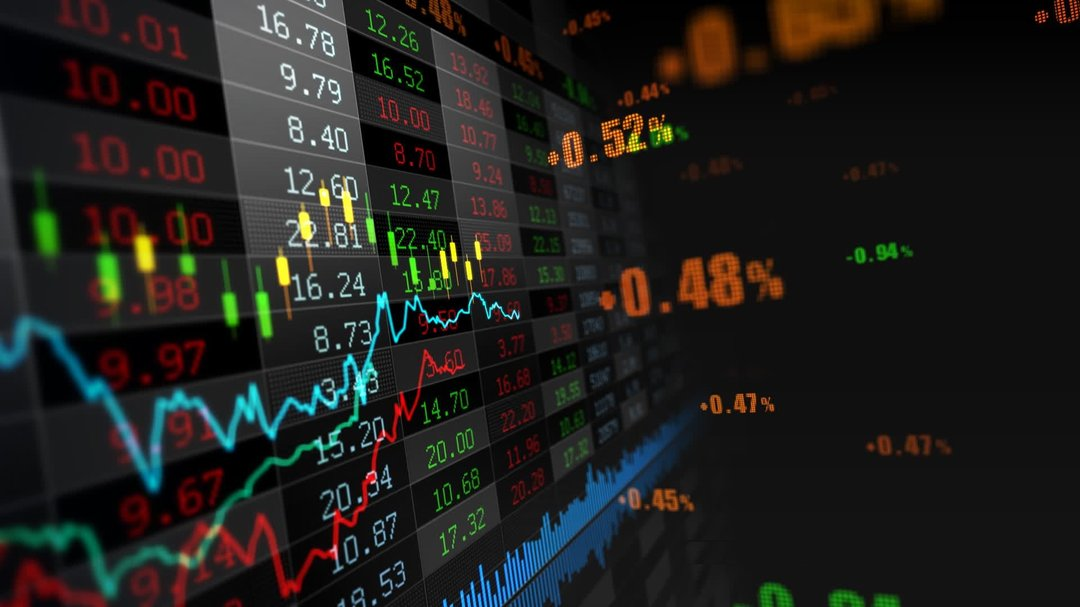

In [65]:
from IPython.display import Image, display

# 查看分辨率最高的图像
display(Image(filename=images[0]["filepath"]))

### 5. 生成 slide-image 字典，并正确嵌入到原始 PowerPoint 内容中

In [66]:
image_pair = {}

In [75]:
for slide_title, query in keywords.items():
    print(slide_title, query)
    # 检索 3张 图像
    images = get_bing_images(slide_title, query, 3)
    if images:
        # 检查并输出图像数据
        for image in images:
            print(f"Name: {image['slide_title']}, Query: {image['query']} 分辨率：{image['width']}x{image['height']}")
    else:
        print(f"No images found for {slide_title}.")
        continue

    # 仅处理分辨率最高的图像
    img = images[0]
    
    # 保存图像到本地
    save_directory = "test"
    os.makedirs(save_directory, exist_ok=True)
    save_path = os.path.join(save_directory, f"{img['slide_title']}_1.jpeg")
    # 默认保存为 JPEG 格式
    save_image(img["obj"], save_path)

    # 新增slide-image 到 image_pair
    image_pair[img["slide_title"]] = save_path

纳斯达克概述 股票市场电子交易
Name: 纳斯达克概述, Query: 股票市场电子交易 分辨率：1920x1080
Name: 纳斯达克概述, Query: 股票市场电子交易 分辨率：860x572
Name: 纳斯达克概述, Query: 股票市场电子交易 分辨率：860x535
Image saved as test/纳斯达克概述_1.jpeg in JPEG format with quality 85.
纳斯达克的市场结构 高科技公司
Name: 纳斯达克的市场结构, Query: 高科技公司 分辨率：2048x1536
Name: 纳斯达克的市场结构, Query: 高科技公司 分辨率：1024x681
Name: 纳斯达克的市场结构, Query: 高科技公司 分辨率：799x529
Image saved as test/纳斯达克的市场结构_1.jpeg in JPEG format with quality 85.
纳斯达克的未来展望 科技创新与投资机会
Name: 纳斯达克的未来展望, Query: 科技创新与投资机会 分辨率：820x1957
Name: 纳斯达克的未来展望, Query: 科技创新与投资机会 分辨率：750x1125
Name: 纳斯达克的未来展望, Query: 科技创新与投资机会 分辨率：700x1080
Image saved as test/纳斯达克的未来展望_1.jpeg in JPEG format with quality 85.


In [76]:
image_pair

{'纳斯达克概述': 'test/纳斯达克概述_1.jpeg',
 '纳斯达克的市场结构': 'test/纳斯达克的市场结构_1.jpeg',
 '纳斯达克的未来展望': 'test/纳斯达克的未来展望_1.jpeg'}

In [77]:
def insert_images(markdown_content, image_pair):
    # 将原始 Markdown 内容按行分割
    lines = markdown_content.split('\n')
    new_lines = []
    i = 0
    while i < len(lines):
        line = lines[i]
        new_lines.append(line)
        # 检查是否为幻灯片标题行（以 '## ' 开头）
        if line.startswith('## '):
            # 提取幻灯片标题
            slide_title = line[3:].strip()
            # 如果幻灯片标题在 image_pair 中，插入对应的图像
            if slide_title in image_pair:
                image_path = image_pair[slide_title]
                # 按照 Markdown 图像格式插入
                image_markdown = f'![{slide_title}]({image_path})'
                new_lines.append(image_markdown)
        i += 1
    # 将修改后的内容重新组合为字符串
    new_content = '\n'.join(new_lines)
    return new_content

In [81]:
new_content = insert_images(slides_content, image_pair)

In [83]:
print(new_content)

# 纳斯达克简介

## 纳斯达克概述
![纳斯达克概述](test/纳斯达克概述_1.jpeg)
- **什么是纳斯达克**: 纳斯达克是美国的一个股票交易市场。
  - 纳斯达克全称为“全国证券交易商自动报价系统”，成立于1971年，是全球第一个电子股票市场。
  - 它主要以科技公司为主，吸引了许多创新型企业上市。
- **纳斯达克的功能**: 提供股票交易和信息服务。
  - 交易者可以通过电子系统进行股票买卖，提升了交易效率。
  - 纳斯达克还提供实时的市场数据和分析工具，帮助投资者做出决策。

## 纳斯达克的市场结构
![纳斯达克的市场结构](test/纳斯达克的市场结构_1.jpeg)
- **市场类型**: 纳斯达克是一个场外交易市场（OTC）。
  - 与传统的交易所不同，纳斯达克没有物理交易场所，所有交易通过电子系统进行。
  - 这种结构使得纳斯达克能够提供更灵活的交易方式。
- **上市公司**: 纳斯达克上市公司主要集中在高科技和生物科技领域。
  - 例如，知名公司如苹果、亚马逊和谷歌母公司Alphabet均在纳斯达克上市。
  - 这些公司通常具有较高的市场增长潜力，吸引了大量投资者。

## 纳斯达克的指数
- **纳斯达克综合指数**: 反映纳斯达克市场整体表现的主要指数。
  - 该指数包含了纳斯达克上市的所有股票，广泛用于衡量市场的健康状况。
  - 投资者可以通过观察该指数的变动来判断市场趋势。
- **纳斯达克100指数**: 包含100家最大的非金融公司。
  - 该指数侧重于大型科技公司，常被视为科技行业的风向标。
  - 投资者可以通过该指数了解科技股的整体表现。

## 纳斯达克的交易机制
- **电子交易系统**: 纳斯达克的交易完全依赖电子系统。
  - 交易者通过计算机进行订单的输入和执行，减少了人为错误。
  - 该系统支持高频交易，能够快速响应市场变化。
- **做市商制度**: 纳斯达克采用做市商制度来提供流动性。
  - 做市商是为特定股票提供买卖报价的公司，确保市场有足够的流动性。
  - 这种机制帮助投资者在需要时能够迅速买入或卖出股票。

## 纳斯达克的投资机会
- **高增长潜力**: 纳斯达克上市公司大多具有较高的增长潜力。
  - 科技行业的快速发展使得许多公司在短时间内实现了巨额利润